Pulling results from both notebooks to join the together

In [1]:
import nbformat
from nbconvert.preprocessors import ExecutePreprocessor
import pandas as pd

def load_notebook(notebook_path):
    with open(notebook_path, 'r') as f:
        nb = nbformat.read(f, as_version=4)

    # Execute the notebook in an isolated environment
    ep = ExecutePreprocessor(timeout=600, kernel_name='python3')
    ep.preprocess(nb, {'metadata': {'path': './'}})  # Run notebook in current directory
    globals_dict = {}
    exec("\n".join(cell.source for cell in nb.cells if cell.cell_type == "code"), globals_dict)
    if "sequence_df" in globals_dict:
        return globals_dict["sequence_df"]
    else:
        raise ValueError(f"'sequence_df' not found in {notebook_path}")

# Load DataFrames from both notebooks
directionality_df = load_notebook('directionality.ipynb')
time_between_detections_df = load_notebook('time_between_detections.ipynb')


Category '1': ['11', '12', '13']
Category '2': ['201', '202', '21', '22', '231', '232', '233']
Category '3': ['301', '302', '3A', '3B']
Category '4': ['401', '402', '41', '42', '44', '45']
Category '5': ['501', '51', '5A', '5B']
Category '6': ['61', '62', '6A', '6B', '6C', '6D', '6F']
Category '7': ['701', '702', '71', '7A', '7B', '7C', '7D']
Category '8': ['81', '82', '83', '84']
Category '9': ['91', '92', '921', '922', '9A', '9B', '9C', '9D', '9F']
Category 'others': ['A1', 'A2', 'AA', 'AB', 'C1', 'C2', '_C']
          tag_id                                                  0
0     989.001007       {'loc_code': ['61', '6A', '6B', '6A', '61']}
1     989.001007                 {'loc_code': ['22', '202', '201']}
2     989.001007       {'loc_code': ['6A', '6B', '6A', '6B', '6A']}
3     989.001007                   {'loc_code': ['61', '6A', '6B']}
4     989.001007                       {'loc_code': ['202', '201']}
...          ...                                                ...
6996  9

<string>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

          tag_id                                      sequence_data
0     989.001007  {'loc_code': ['61', '6A', '6B', '6A', '61'], '...
1     989.001007  {'loc_code': ['22', '202', '201'], 'time_betwe...
2     989.001007  {'loc_code': ['6A', '6B', '6A', '6B', '6A'], '...
3     989.001007  {'loc_code': ['61', '6A', '6B'], 'time_between...
4     989.001007  {'loc_code': ['202', '201'], 'time_between_det...
...          ...                                                ...
6996  989.002028  {'loc_code': ['91'], 'time_between_detections'...
6997  989.002028  {'loc_code': ['91', '922', '9A', '9B'], 'time_...
6998  989.002028  {'loc_code': ['91', '921', '922', '9A', '9B'],...
6999  989.002028  {'loc_code': ['91'], 'time_between_detections'...
7000  989.002028  {'loc_code': ['91', '922', '921', '922', '9B',...

[7001 rows x 2 columns]


In [2]:
directionality_df

,tag_id,loc_code,movement_direction
0,989.001007,"[61, 6A, 6B, 6A, 61]","[us, us, ds, ds]"
1,989.001007,"[22, 202, 201]","[us, ds]"
2,989.001007,"[6A, 6B, 6A, 6B, 6A]","[us, ds, us, ds]"
3,989.001007,"[61, 6A, 6B]","[us, us]"
4,989.001007,"[202, 201]",[ds]
...,...,...,...
6996,989.002028,[91],[]
6997,989.002028,"[91, 922, 9A, 9B]","[us, us, us]"
6998,989.002028,"[91, 921, 922, 9A, 9B]","[us, us, us, us]"
6999,989.002028,[91],[]


In [3]:
time_between_detections_df

,tag_id,loc_code,time_between_detections,number_of_detections
0,989.001007,"[61, 6A, 6B, 6A, 61]","[0 days 00:15:36.770000, 0 days 00:15:46.65000...","[3, 1, 6, 1, 4]"
1,989.001007,"[22, 202, 201]","[14 days 21:54:52.150000, 0 days 00:05:54.7500...","[10, 1, 1]"
2,989.001007,"[6A, 6B, 6A, 6B, 6A]","[0 days 00:00:06.370000, 0 days 00:00:16.13000...","[1, 6, 1, 14, 7]"
3,989.001007,"[61, 6A, 6B]","[0 days 00:07:41.460000, 0 days 00:01:38.94000...","[2, 1, 3]"
4,989.001007,"[202, 201]","[0 days 00:20:52.190000, NaT]","[1, 1]"
...,...,...,...,...
6996,989.002028,[91],[NaT],[2]
6997,989.002028,"[91, 922, 9A, 9B]","[1 days 06:24:57.110000, 5 days 06:23:08.72000...","[1, 1, 1, 1]"
6998,989.002028,"[91, 921, 922, 9A, 9B]","[2 days 10:04:40.160000, 0 days 00:02:57.40000...","[1, 1, 2, 2, 2]"
6999,989.002028,[91],[NaT],[1]


In [4]:
time_between_detections_df = time_between_detections_df.drop(columns=["loc_code"])  
merged_df = directionality_df.merge(time_between_detections_df, on="tag_id")  
merged_df = merged_df[['tag_id', 'loc_code', 'number_of_detections', 'movement_direction', 'time_between_detections']]
merged_df

,tag_id,loc_code,number_of_detections,movement_direction,time_between_detections
0,989.001007,"[61, 6A, 6B, 6A, 61]","[3, 1, 6, 1, 4]","[us, us, ds, ds]","[0 days 00:15:36.770000, 0 days 00:15:46.65000..."
1,989.001007,"[22, 202, 201]","[10, 1, 1]","[us, ds]","[14 days 21:54:52.150000, 0 days 00:05:54.7500..."
2,989.001007,"[6A, 6B, 6A, 6B, 6A]","[1, 6, 1, 14, 7]","[us, ds, us, ds]","[0 days 00:00:06.370000, 0 days 00:00:16.13000..."
3,989.001007,"[61, 6A, 6B]","[2, 1, 3]","[us, us]","[0 days 00:07:41.460000, 0 days 00:01:38.94000..."
4,989.001007,"[202, 201]","[1, 1]",[ds],"[0 days 00:20:52.190000, NaT]"
...,...,...,...,...,...
6996,989.002028,[91],[2],[],[NaT]
6997,989.002028,"[91, 922, 9A, 9B]","[1, 1, 1, 1]","[us, us, us]","[1 days 06:24:57.110000, 5 days 06:23:08.72000..."
6998,989.002028,"[91, 921, 922, 9A, 9B]","[1, 1, 2, 2, 2]","[us, us, us, us]","[2 days 10:04:40.160000, 0 days 00:02:57.40000..."
6999,989.002028,[91],[1],[],[NaT]


In [5]:
merged_df.to_csv("data/tag summaries.csv", index=False)

In [6]:
unusual = merged_df[merged_df["movement_direction"].apply(lambda x: "unknown" in x)]
unusual

,tag_id,loc_code,number_of_detections,movement_direction,time_between_detections
94,989.001034,"[61, 61, 61]","[1, 2, 1]","[unknown, unknown]","[0 days 00:17:31.940000, 0 days 11:53:05.49000..."
131,989.001034,"[7B, 7A, 71]","[18, 8, 3]","[ds, unknown]","[0 days 00:00:24.840000, NaT, NaT]"
192,989.001034,"[7B, 7A, 7B, 7A, 7B, 71]","[1, 11, 1, 4, 1, 32]","[ds, us, ds, us, unknown]","[0 days 00:00:47.110000, 0 days 00:01:11.05000..."
208,989.001034,"[9D, 9A, 9B]","[1, 1, 1]","[unknown, us]","[NaT, 0 days 00:00:03.070000, NaT]"
212,989.001034,"[9C, 9D, 91]","[1, 1, 2]","[unknown, ds]","[NaT, NaT, NaT]"
...,...,...,...,...,...
6687,989.001046,"[9D, 9C, 91, 922, 921, 922, 9A, 9B, 9A]","[1, 1, 2, 4, 1, 1, 1, 2, 1]","[unknown, ds, us, ds, us, us, us, ds]","[0 days 00:00:02.150000, 114 days 14:42:54.420..."
6689,989.002027,"[61, 61, 61]","[1, 1, 1]","[unknown, unknown]","[0 days 00:02:06.630000, 116 days 21:17:52.990..."
6711,989.002028,"[6A, 501]","[1, 3136]",[unknown],"[13 days 06:02:27.910000, NaT]"
6912,989.002028,"[922, 921, 9D, 9C, 9D, 9C, 9D, 9C, 9D, 9C, 9D,...","[1, 1, 1, 5, 1, 15, 12, 25, 17, 9, 8, 9, 3, 11...","[ds, unknown, unknown, unknown, unknown, unkno...","[0 days 00:00:34.200000, 0 days 21:48:35.76000..."


In [7]:
unusual.to_csv("data/unusual movements.csv", index=False)

Count/Visualize movement direction

In [8]:
filtered_df = merged_df[~merged_df["movement_direction"].apply(lambda x: "unknown" in x)] # remove any "unknown"

In [9]:
all_items = [tuple(sorted(item)) for sublist in filtered_df['movement_direction'] for item in [sublist]]
counts = pd.Series(all_items).value_counts()
movement_counts = pd.DataFrame({'Combination': counts.index, 'Count': counts.values})
movement_counts

,Combination,Count
0,(),1545
1,"(ds,)",687
2,"(ds, us)",634
3,"(us,)",599
4,"(ds, us, us)",350
...,...,...
150,"(ds, ds, ds, ds, us, us, us, us, us, us, us, us)",1
151,"(ds, ds, ds, ds, ds, ds, ds, ds, ds, ds, us, u...",1
152,"(ds, ds, ds, ds, ds, ds, ds, ds, ds, ds, ds, d...",1
153,"(ds, ds, ds, ds, ds, ds, ds, ds, ds, ds, ds, d...",1


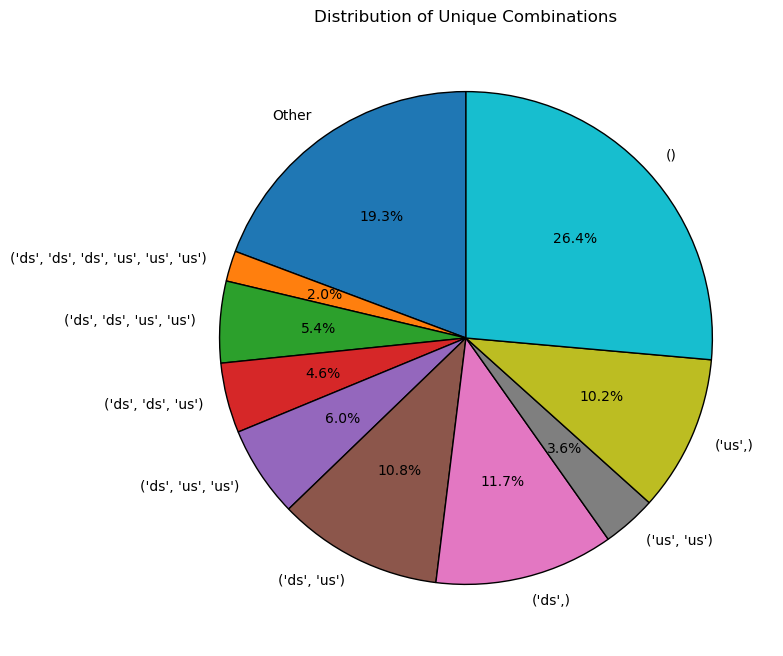

In [10]:
import matplotlib.pyplot as plt
import numpy as np

total_count = movement_counts["Count"].sum()

# 2% is considered the threshold, if the catagory has <2% = other
threshold = 0.02 * total_count

movement_counts["Category"] = np.where(movement_counts["Count"] < threshold, "Other", movement_counts["Combination"])
pie_data = movement_counts.groupby("Category")["Count"].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(pie_data["Count"], labels=pie_data["Category"], autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Distribution of Unique Combinations")
plt.show()
